In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2023-12-21'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
ma_100_days = data.Close.rolling(100).mean()

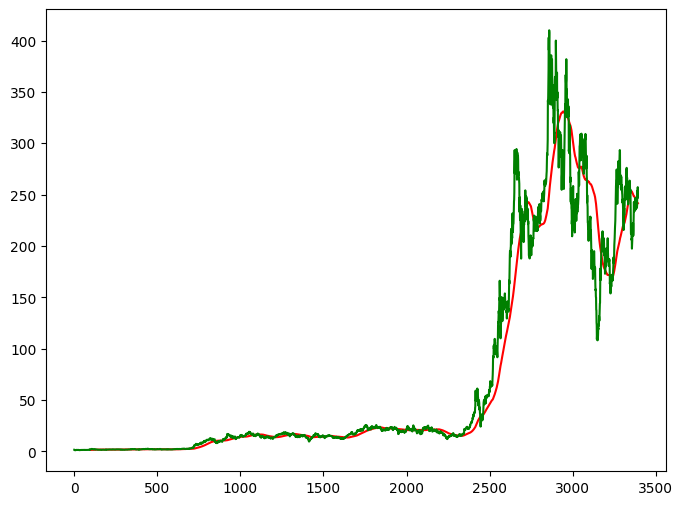

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

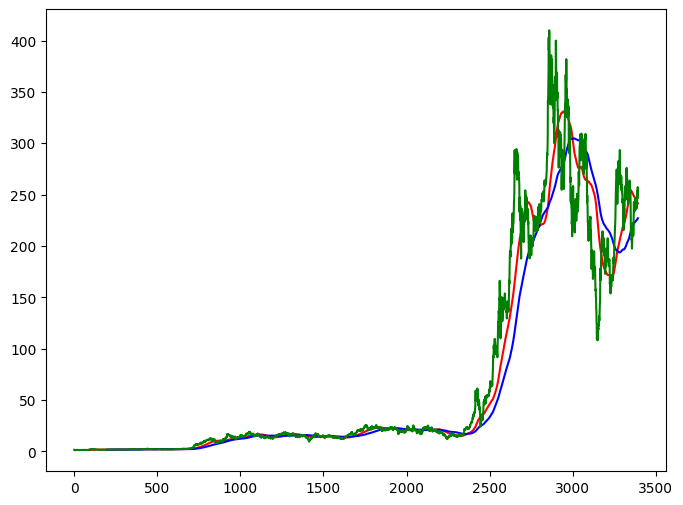

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2715

In [12]:
data_test.shape[0]

679

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\yashr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 100, batch_size =32, verbose =1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 0.0152
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0022
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0026
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0018
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0023
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0019
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0027
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0019
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0017
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0018
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0012
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0013
Epoch 13/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0015
Epoch 14/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0013
Epoch 15/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - l

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

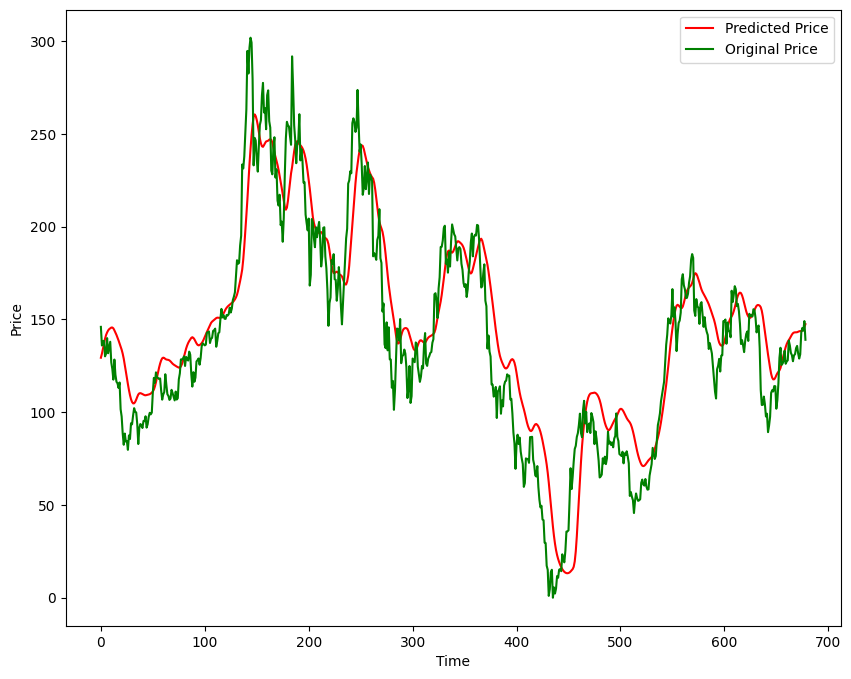

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('D:\Ambitions\Winter 24\PE1\Project\Keras Files\TSLA.keras')

In [32]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3389,2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
3390,2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
3391,2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500
3392,2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400
